# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [68]:
#%matplotlib inline

#from IPython.core.pylabtools import figsize

#plt.show(block=True)

#figsize(12, 8)

#sns.set()

## Parte 1

### _Setup_ da parte 1

In [69]:
# Definir semente
np.random.seed(42)
# Gerar dataset para questoes
dataframe = pd.DataFrame({"normal": stats.norm.rvs(20, 4, size=10000),
                     "binomial": stats.binom.rvs(100, 0.2, size=10000)})

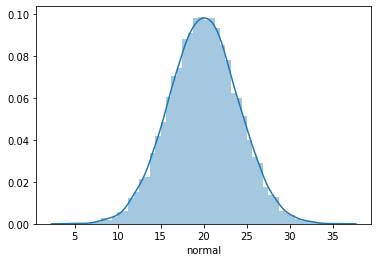

In [143]:
sns.distplot(dataframe['normal']);

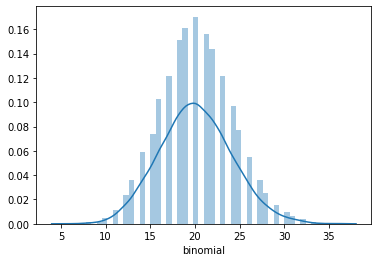

In [144]:
sns.distplot(dataframe["binomial"]);

## Inicie sua análise a partir da parte 1 a partir daqui

In [70]:
# Verificar algumas informações
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
normal      10000 non-null float64
binomial    10000 non-null int32
dtypes: float64(1), int32(1)
memory usage: 117.3 KB


## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [71]:
def q1():
    # Calcular quantiles
    quantiles_norm = dataframe['normal'].quantile([0.25,0.5,0.75])
    quantiles_bino = dataframe['binomial'].quantile([0.25,0.5,0.75])
    # Calcular diferenças
    q1_diff = round(quantiles_norm[0.25] - quantiles_bino[0.25], 3)
    q2_diff = round(quantiles_norm[0.50] - quantiles_bino[0.50], 3)
    q3_diff = round(quantiles_norm[0.75] - quantiles_bino[0.75], 3)
    # Retornar
    return (q1_diff, q2_diff, q3_diff)

In [165]:
# Resposta
q1()

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [137]:
def q2():
    # Calcular parâmetros da distribuição
    mean_value = dataframe["normal"].mean()
    stdv_value = dataframe["normal"].std()
    # Calcular ECDF
    ecdf_vals = ECDF(dataframe["normal"])
    # Avaliar prob do intervalo
    resultado = round((ecdf_vals(mean_value + stdv_value) - ecdf_vals(mean_value - stdv_value)), 3)
    # Retornar
    return float(resultado)
    
    #### RESULTADO CORRETO TEORICAMENTE, MAS ERRADO NUMERICAMENTE
    # Calcular parâmetros da distribuição
    #mean_value = round(dataframe['normal'].mean())
    #stdv_value = round(dataframe['normal'].std())
    # Calcular CDF até limite minimo
    #cdf_limite_min = stats.norm.cdf(mean_value - stdv_value, loc=mean_value, scale=stdv_value)
    # Calcular CDF até limite maximo
    #cdf_limite_max = stats.norm.cdf(mean_value + stdv_value, loc=mean_value, scale=stdv_value)
    # Retorne aqui o resultado da questão 2
    # OBS - Tentei diversas maneiras entender, mas meu resultado nao apresenta a terceira casa decimal, gostaria de dicas
    #return float(round(cdf_limite_max - cdf_limite_min, 3))
    ####

In [164]:
# Resposta
q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [40]:
def q3():
    # Calcular medias
    mean_norm = dataframe['normal'].mean()
    mean_bino = dataframe['binomial'].mean()
    # Calcular variancias
    var_norm = dataframe['normal'].var()
    var_bino = dataframe['binomial'].var()
    # Retornar
    return (round(mean_bino-mean_norm, 3), round(var_bino-var_norm, 3))

In [163]:
# Resposta
q3()

array([0.106, 0.22 ])

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [10]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [11]:
# Verificar dataframe cabeçalho
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [98]:
# Filtrar valores para questão 4 e 5
valores_filtrados = stars.loc[stars['target'] == False ,'mean_profile']
# Padronizar
valores_filtrados = (valores_filtrados - valores_filtrados.mean())/valores_filtrados.std()

In [168]:
def q4():
    # Calcular os quantiles de uma distribuição normal
    quants = stats.norm.ppf([0.8, 0.90, 0.95])
    # Calcular ECDF da coluna para ser analisada
    ecdf_vals = ECDF(valores_filtrados)
    # Calcular CDFs
    resultado = ecdf_vals([quants])[0]
    return tuple(resultado.round(3))

In [169]:
# Resposta
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [135]:
def q5():
    # Calcular Quantiles
    quants_vals = valores_filtrados.quantile([0.25,0.5,0.75])
    quants_norm = stats.norm.ppf([0.25, 0.50, 0.75])
    # Calcular diff
    quants_diff = quants_vals - quants_norm
    # Retornar
    return tuple(quants_diff.round(3))

In [162]:
# Resposta
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.